In [1]:
import numpy as np
import os
import cv2

DATADIR = "D:/Datasets/dogsandcats"
CATEGORIES = ["Dog", "Cat"]
IMG_SIZE = 60

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass # broken image lol

create_training_data()

In [2]:
print(len(training_data))

24946


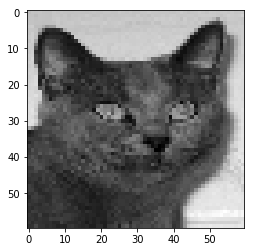

In [5]:
import random
import numpy as np

random.shuffle(training_data)

import matplotlib.pyplot as plt
plt.imshow(training_data[0][0], cmap="gray")
plt.show()

X = []
y = []



for example, label in training_data:
    X.append(example)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = X / 255.0 # scale to [0.1]

# save our data
np.save("X.npy", X)
np.save("y.npy", y)

In [2]:
# TRAINING THE MODEL

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time
import numpy as np

# Name for model - timestamped
NAME = "dog-cat-binary-grayscale-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

X = np.load("X.npy")
y = np.load("y.npy")

model = Sequential()

# Conv2D(filters, filter_size, input_shape)
# must specify input shape if it is the first layer of the model
model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=5, validation_split=0.2, callbacks=[tensorboard])

# to see the logs in tensorboard
# cd into the directory with the log folder
# type `tensorboard --logdir=logs/` in cmd.exe
# go to provided link

model.save('64x2-CNN.model')

Train on 19956 samples, validate on 4990 samples
Epoch 1/5
19956/19956 [==============================] - 10s 522us/step - loss: 0.6214 - acc: 0.6466 - val_loss: 0.5556 - val_acc: 0.7277
Epoch 2/5
19956/19956 [==============================] - 8s 376us/step - loss: 0.5263 - acc: 0.7436 - val_loss: 0.4944 - val_acc: 0.7713
Epoch 3/5
19956/19956 [==============================] - 7s 370us/step - loss: 0.4924 - acc: 0.7625 - val_loss: 0.4741 - val_acc: 0.7788
Epoch 4/5
19956/19956 [==============================] - 8s 377us/step - loss: 0.4645 - acc: 0.7821 - val_loss: 0.4714 - val_acc: 0.7846
Epoch 5/5
19956/19956 [==============================] - 7s 359us/step - loss: 0.4425 - acc: 0.7927 - val_loss: 0.4456 - val_acc: 0.7974


In [ ]:
# PREDICTIONS WITH THE MODEL

import cv2
import tensorflow as tf

CATEGORIES = ["Dog", "Cat"]
